### Machine Learning 
+ Supervised ML with Iris Dataset

In [35]:
# EDA packages
import pandas as pd
import numpy as np

In [36]:
# Plotting Packages
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
# ML Packages

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression



#### EDA Descriptive

In [76]:
# load our dataset
df = pd.read_csv("iris.csv")

In [77]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [78]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [79]:
# Check for missing values
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [80]:
df.shape

(150, 5)

In [81]:
# Species distribution
print(df.groupby('species').size())

species
setosa        50
versicolor    50
virginica     50
dtype: int64


### Data Visualization
+ Understand each attribute
+ Understand relationship between each

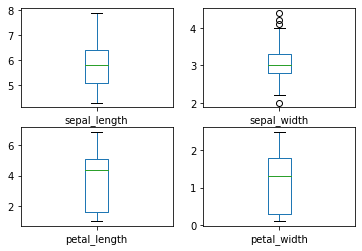

In [82]:
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

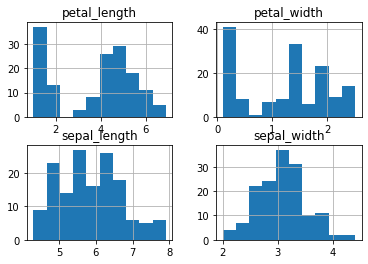

In [83]:
# histograms using pandas plot
df.hist()
plt.show()

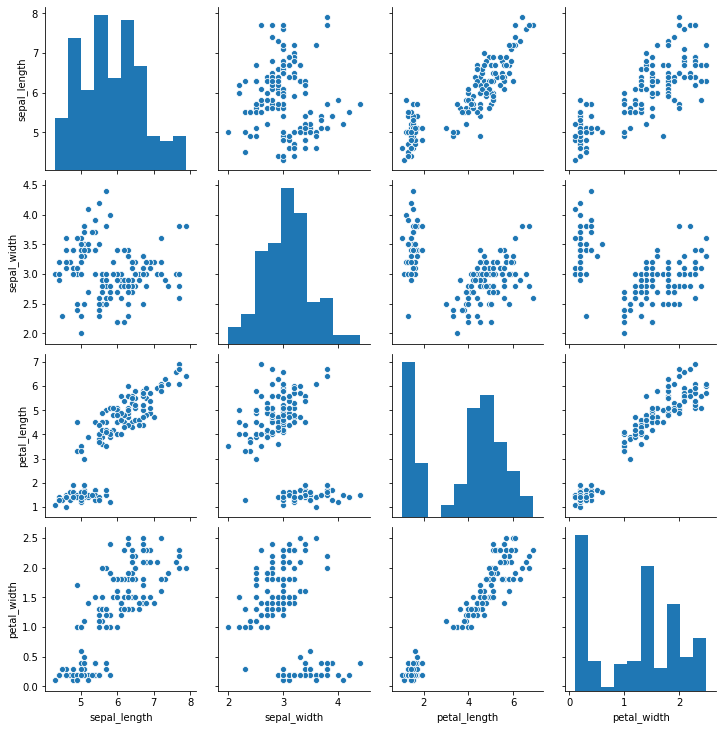

In [84]:
# Multivariate Plots
# Relationships between each attribute
sns.pairplot(df)

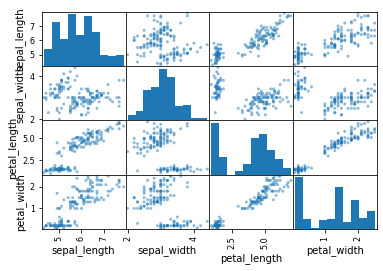

In [85]:
# scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

In [86]:
### ML 

In [88]:
# Split-out validation dataset
array = df.values
X = array[:,0:4]
Y = array[:,4]


### Train Test Split

In [74]:
Y.shape

(768,)

In [93]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [94]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()

In [95]:
logit.fit(X_train,Y_train)

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
print("accuracy :" , logit.score(X_validation,Y_validation))

accuracy : 0.8666666666666667


In [97]:
logit.predict(X_validation)

array(['virginica', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica'],
      dtype=object)

In [98]:
# Individual Prediction
mysample = np.array([4.9,3.0,1.4,0.2])
ex1 = mysample.reshape(1,-1)
#Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [99]:
logit.predict(ex1)

array(['setosa'], dtype=object)

### Saving or Persisting Our Model
+ Pickle 
+ Joblib

In [57]:
# Save Model Using Pickle
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)
# Fit the model on 33%
model = LogisticRegression()
model.fit(X_train, Y_train)
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.7874015748031497


C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [58]:
from sklearn.externals import joblib
joblib.dump(logit, 'logit_model_iris.pkl') 

['logit_model_iris.pkl']

In [59]:
# Reloading the Model
logit_model = joblib.load('logit_model_iris.pkl')

In [60]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [61]:
ex2 = np.array([6.2,3.4,5.4,2.3]).reshape(1,-1)


In [62]:
logit_model.predict(ex2)

array(['virginica'], dtype=object)

In [63]:
### Get the Models for the other ML Algorithms

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [65]:
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier()
svm = SVC() 

In [67]:
# Fit the model
knn.fit(X_train, Y_train)
print("accuracy :" , knn.score(X_validation,Y_validation))

ValueError: query data dimension must match training data dimension

In [68]:
# save the model to disk
joblib.dump(knn, 'knn_model_iris.pkl') 

['knn_model_iris.pkl']

In [69]:
dtree.fit(X_train, Y_train)
print("accuracy :" , dtree.score(X_validation,Y_validation))

ValueError: Number of features of the model must match the input. Model n_features is 8 and input n_features is 4 

In [70]:
# save the model to disk
joblib.dump(dtree, 'dtree_model_iris.pkl') 

['dtree_model_iris.pkl']

In [71]:
svm.fit(X_train, Y_train)
print("accuracy :" , svm.score(X_validation,Y_validation))

ValueError: X.shape[1] = 4 should be equal to 8, the number of features at training time

In [72]:
# save the model to disk
joblib.dump(svm, 'svm_model_iris.pkl') 

['svm_model_iris.pkl']